In [1]:
import numpy as np
import pandas as pd
import talib as ta

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas_datareader.data as web
import datetime as dt

In [3]:
start=dt.datetime(2000,1,1)
end=dt.datetime(2019,11,11)

In [26]:
df=web.DataReader('SPY','yahoo',start,end)

In [27]:
df=df.dropna()
df=df.iloc[:,:5]
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0


In [28]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['30m']= df['Close'].rolling(window=30).mean()
df['rsi'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df = df.dropna()
x = df.iloc[:,:8]
x.head()


,High,Low,Open,Close,Volume,S_10,30m,rsi
Date,,,,,,,,
2000-02-14,139.78125,138.312500,139.78125,139.500000,8528800.0,141.550000,142.358333,42.714947
2000-02-15,141.21875,137.796875,139.25000,141.078125,11078300.0,141.564063,142.213021,47.946356
2000-02-16,140.93750,138.796875,140.37500,139.000000,8845400.0,141.357812,142.188021,42.294983
2000-02-17,140.43750,138.218750,140.43750,138.281250,7584200.0,140.867188,142.130729,40.462198
2000-02-18,138.87500,134.625000,138.87500,135.312500,9409200.0,140.139062,142.049479,33.750194


In [30]:
y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)


split=int(0.7*len(df))

x_train, x_test, y_train, y_test = x[:split], x[split:], y[:split], y[split:]

In [31]:
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)

C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [32]:
from sklearn.svm import SVR
svr=SVR()

svr=svr.fit(x_train,y_train)

C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
svr_score=svr.score(x_test,y_test)

print(svr_score)

-0.0005870251778123947


In [34]:
lr_score=lr.score(x_test,y_test)
print(lr_score)

0.5432595573440644


In [35]:
predicted=lr.predict(x_test)
print(predicted)

[1 1 1 ... 1 1 1]


In [36]:
cross_val= cross_val_score(LogisticRegression(),x,y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.53722334 0.53722334 0.53722334 0.53722334 0.53722334 0.53722334
 0.53722334 0.53722334 0.53722334 0.53737374]
0.537238379773591


C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\joaod\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

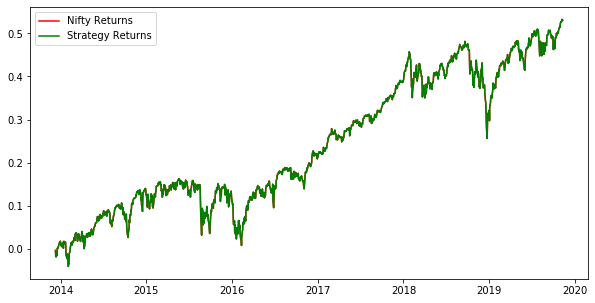

In [39]:
df['Predicted_Signal'] = lr.predict(x)
df['Nifty_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(df[split:]['Nifty_returns'])
df['Startegy_returns'] = df['Nifty_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Startegy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()